### import library 

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


### read csv

In [4]:
play_tennis  = pd.read_csv('Gender_Classification.csv')
print(play_tennis)

   Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink  \
0            Cool                 Rock             Vodka          7UP/Sprite   
1         Neutral              Hip hop             Vodka     Coca Cola/Pepsi   
2            Warm                 Rock              Wine     Coca Cola/Pepsi   
3            Warm     Folk/Traditional           Whiskey               Fanta   
4            Cool                 Rock             Vodka     Coca Cola/Pepsi   
..            ...                  ...               ...                 ...   
61           Cool                 Rock             Vodka     Coca Cola/Pepsi   
62           Cool              Hip hop              Beer     Coca Cola/Pepsi   
63        Neutral              Hip hop     Doesn't drink               Fanta   
64           Cool                 Rock              Wine     Coca Cola/Pepsi   
65           Cool           Electronic              Beer     Coca Cola/Pepsi   

   Gender  
0       F  
1       F  
2  

### LabelEncoder

In [13]:
number = preprocessing.LabelEncoder()

play_tennis['Favorite Color'] = number.fit_transform(play_tennis['Favorite Color'])
play_tennis['Favorite Music Genre'] = number.fit_transform(play_tennis['Favorite Music Genre'])
play_tennis['Favorite Beverage'] = number.fit_transform(play_tennis['Favorite Beverage'])
play_tennis['Favorite Soft Drink'] = number.fit_transform(play_tennis['Favorite Soft Drink'])
print(play_tennis)
play_tennis.head(12)

    Favorite Color  Favorite Music Genre  Favorite Beverage  \
0                0                     6                  3   
1                1                     2                  3   
2                2                     6                  5   
3                2                     1                  4   
4                0                     6                  3   
..             ...                   ...                ...   
61               0                     6                  3   
62               0                     2                  0   
63               1                     2                  1   
64               0                     6                  5   
65               0                     0                  0   

    Favorite Soft Drink Gender  
0                     0      F  
1                     1      F  
2                     1      F  
3                     2      F  
4                     1      F  
..                  ...    ...  
61          

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,F
1,1,2,3,1,F
2,2,6,5,1,F
3,2,1,4,2,F
4,0,6,3,1,F
5,2,3,1,2,F
6,0,4,0,1,F
7,2,4,4,2,F
8,2,6,2,0,F
9,1,4,5,1,F


### Naive Bayes

In [7]:
Gaussian_NB = GaussianNB()
Bernoulli_NB = BernoulliNB()
Multinomial_NB = MultinomialNB()
Categorical_NB = CategoricalNB()

#### GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB

- แบ่งข้อมูลที่ใช้สำหรับการสอน training set 70% 
- ข้อมูลที่ใช้สำหรับการทดสอบ test set 30% 

### Evaluating Model

In [9]:
X = play_tennis[['Favorite Color','Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink']]
Y = play_tennis['Gender']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=5)
Gaussian_NB.fit(X_train,y_train)
Bernoulli_NB.fit(X_train,y_train)
Multinomial_NB.fit(X_train,y_train)
Categorical_NB.fit(X_train,y_train)

Y_Predict_GNB = Gaussian_NB.predict(X_test)
Y_Predict_BNB = Bernoulli_NB.predict(X_test)
Y_Predict_MNB = Multinomial_NB.predict(X_test)
Y_Predict_CNB = Categorical_NB.predict(X_test)
print(len(X_train),len(X_test),len(y_train),len(y_test))
print("Gaussian Accuracy:",metrics.accuracy_score(y_test, Y_Predict_GNB))
print("Bernoulli Accuracy:",metrics.accuracy_score(y_test, Y_Predict_GNB))
print("Multinomial Accuracy:",metrics.accuracy_score(y_test, Y_Predict_GNB))
print("Categorical Accuracy:",metrics.accuracy_score(y_test, Y_Predict_GNB))

46 20 46 20
Gaussian Accuracy: 0.65
Bernoulli Accuracy: 0.65
Multinomial Accuracy: 0.65
Categorical Accuracy: 0.65


### K-Nearest Neighbor

In [11]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)

Y_Predict_KNN =KNN_model.predict(X_test)
print("KNN Accuracy:",metrics.accuracy_score(y_test, Y_Predict_KNN))

KNN Accuracy: 0.7


### confusion_matrix

[[6 3]
 [4 7]]


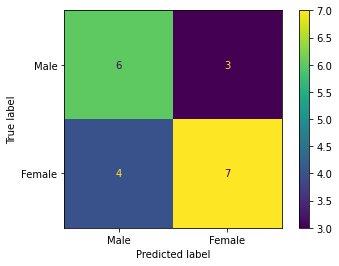

In [17]:

confusion_matrix = metrics.confusion_matrix(y_test, Y_Predict_BNB)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Male', 'Female'])

cm_display.plot()
plt.show()

### Predict new data 

ใช้โมเดลที่มี Accuracy สูงที่สุดทำนาย new data 

In [18]:
predicted= KNN_model.predict([[1,1,2,1]])
print("Predicted Value:", predicted)

Predicted Value: ['M']


C:\Users\user\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### data[2]
1. Neutral
2. Folk/Traditional
3. Other
4. Coca Cola/Pepsi